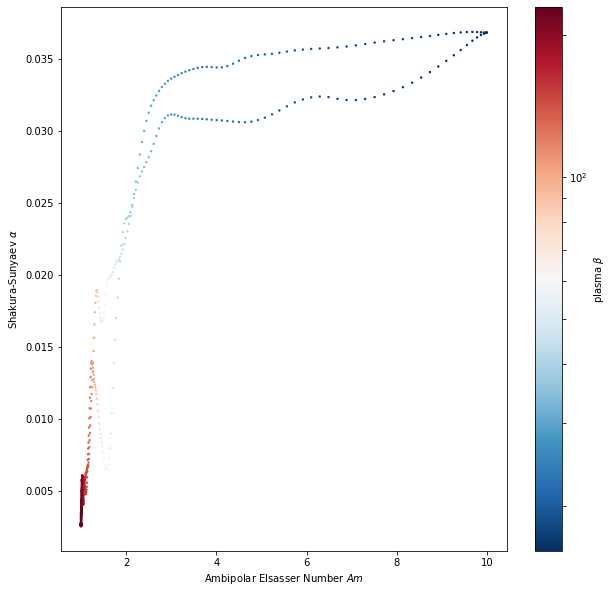

In [27]:
#for only one run, setup
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt
from matplotlib import colors as clr

start=time.time()
x_arr = np.linspace(-4,4,512)
#figure setup
plt.figure(figsize=(10,10))
plt.xlabel('Ambipolar Elsasser Number $Am$')
plt.ylabel('Shakura-Sunyaev $\\alpha$')
def alphabeta_plot(file_path):
    #read the necessary parameters from the file path
    sgn = 1
    amp = 1
    sig = 1
    eta = 1
    if 'sig_point25' in file_path:
        sig = .25
    if 'sig_1' in file_path:
        sig = 1
    if 'sig_5' in file_path:
        sig = 5
    if 'inv'in file_path:
        sgn = -1
    if 'amp_point5'in file_path:
        amp = .5
        eta = 1/amp
    if 'amp_1' in file_path:
        amp = 1
        eta = 1/amp
    if 'amp_5' in file_path:
        amp = 5
        eta = 1/amp
    if 'const' in file_path:
        sig = 'flat'
    
    #Am list
    if sgn == -1:
        if sig == 'flat':
            y_array = eta * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta*(1-.9*np.exp(-(x_arr**2)/(2*(sig**2)))) 
    if sgn == 1:
        if sig == 'flat':
            y_array = eta * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta*(.9*np.exp(-(x_arr**2)/(2*(sig**2)))+.1) 
    #convert eta array to am
    am_array = 1/y_array
    #alpha list
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    #beta list
    prof_beta,upper_beta,lower_beta = cmp.avg_beta_prof(file_path)
    
    
    #plotting section
    clr.cmap = 'RdBu_r' 
    norm1=clr.SymLogNorm(vmin=min(prof_beta),vmax=max(prof_beta),linthresh=0.03)
    plt.scatter(am_array,prof_avg_tot,c=prof_beta,cmap = 'RdBu_r',s=2,norm=norm1)
    
file_path = './ad_prof/amp_1/inv_sig_1'
alphabeta_plot(file_path)
plt.colorbar(label = 'plasma $\\beta$')

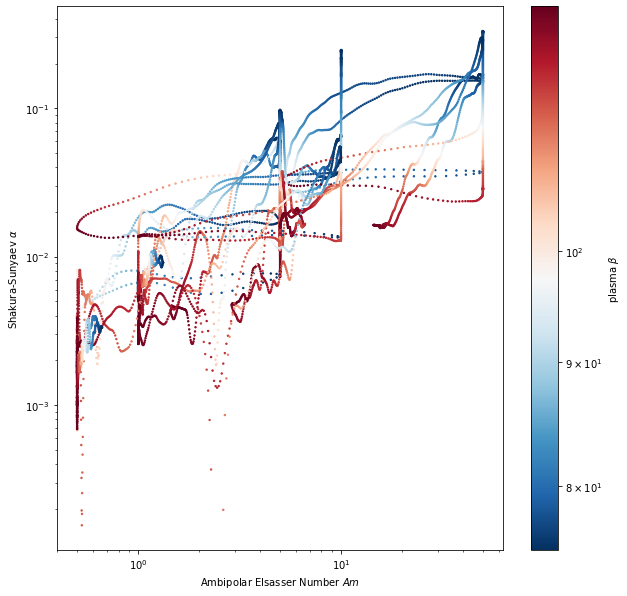

In [28]:
#iterate over all runs
start=time.time()
x_arr = np.linspace(-4,4,512)
plt.figure(figsize=(10,10))
plt.xlabel('Ambipolar Elsasser Number $Am$')
plt.ylabel('Shakura-Sunyaev $\\alpha$')

file_list = [    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5",
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/inv_sig_point25",
    "./ad_prof/amp_5/inv_sig_1",
    "./ad_prof/amp_5/inv_sig_5",
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5",
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5",
    "./ad_prof/amp_5/sig_point25",
    "./ad_prof/amp_5/sig_1",
    "./ad_prof/amp_5/sig_5",
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5"
]
counter = 0
for filepath in file_list:
    alphabeta_plot(filepath)
    counter+=1
    #print('done with ',counter)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label = 'plasma $\\beta$')